In [1]:
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 3.1 MB/s eta 0:00:00a 0:00:01


In [17]:
import fastf1 as ff1
import fastf1.plotting

import numpy as np
import pandas as pd

In [18]:
# Enable the cache by providing the name of the cache folder
ff1.Cache.enable_cache('cache')

In [19]:
year= 2024
gp = 'Bahrain'
event = 'R'

In [20]:
session = ff1.get_session(year, gp, event)
session.load()
laps = session.laps

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']


In [21]:
drivers = session.drivers
print(drivers)

['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']


In [22]:
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

['VER', 'PER', 'SAI', 'LEC', 'RUS', 'NOR', 'HAM', 'PIA', 'ALO', 'STR', 'ZHO', 'MAG', 'RIC', 'TSU', 'ALB', 'HUL', 'OCO', 'GAS', 'BOT', 'SAR']


In [23]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

In [24]:
stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

   Driver  Stint Compound  StintLength
0     ALB    1.0     SOFT           15
1     ALB    2.0     HARD           21
2     ALB    3.0     HARD           20
3     ALO    1.0     SOFT           15
4     ALO    2.0     HARD           26
..    ...    ...      ...          ...
58    VER    2.0     HARD           20
59    VER    3.0     SOFT           20
60    ZHO    1.0     SOFT            9
61    ZHO    2.0     HARD           19
62    ZHO    3.0     HARD           28

[63 rows x 4 columns]


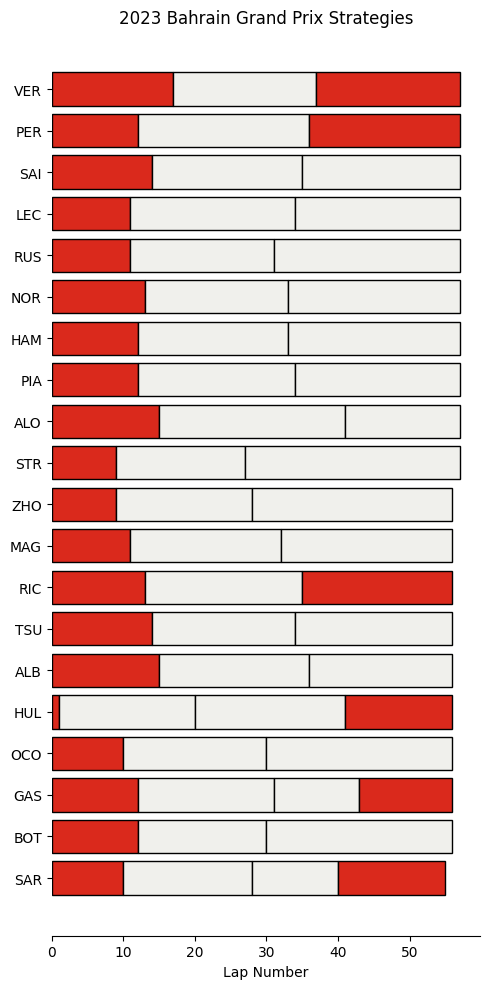

In [25]:
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                            session=session)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

plt.title("2023 Bahrain Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()